<a href="https://colab.research.google.com/github/paulc00/ML-Intro/blob/master/notebooks/4_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision trees

Decision trees are one of the easiest models to explain to non-experts. The tree is almost self explanatory. The class assignment is made as a result of a set of rules that can be read by descending the tree.

The challenges in decision trees include the technical way they are built up and in getting enough predictive power from the models.


1. For each node containing multiple clases at the current level:
  1. Select a feature
  2. Select a threshold for the selected feature (if continuous or non-binary)
  3. Divide the dataset into two subsets with the selected attribute on one subset less than or equal to the threshold and greater than the threshold on the other subset. Or just the binary class values for binary features.
2. If all elements of each subset are not of the same class then repeat from 1.

The above algorithm uses binary splits. Variations of this algorithm can support non-binary splits by using multiple thresholds (continuous feature) or one subset per class (discrete or categorical feature).

The split feature and threshold are selected using a split criterion. There are three criteria provided by scikit-learn:
1. Gini impurity: looks at how different from each other feature values within subsets after a split
2. Information gain: looks at the amount of information needed to identify the class before and after the split
3. Gain ratio: Weights information gain such that it takes the number and size of branches into account.


In [0]:
import numpy as np
import pandas as pd

# Import the functions we'll need from scikit-learn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import RFE

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [0]:
breast_cancer_dataset = load_breast_cancer()

In [0]:
# X = pd.DataFrame(breast_cancer_dataset.data[:, corr_support], columns=breast_cancer_dataset.feature_names[corr_support])
X = pd.DataFrame(breast_cancer_dataset.data, columns=breast_cancer_dataset.feature_names)
y = breast_cancer_dataset.target

In [0]:
# Split our data into training and testing sets using random sampling with 20% of the data as test data
# X_tv, X_test, y_tv, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)  # random_state will cause the same random sequence to be generated every time
# X_train, X_valid, y_train, y_valid = train_test_split(X_tv, y_tv, test_size = 0.4, random_state=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)  # random_state will cause the same random sequence to be generated every time

In [0]:
pd.set_option('display.max_columns', len(X_train.columns))
print(X_train.describe())
pd.reset_option('display.max_columns')
print('\n\n')
print(X_train.info())

       mean radius  mean texture  mean perimeter    mean area  \
count   455.000000    455.000000      455.000000   455.000000   
mean     14.063488     19.080615       91.469934   647.584835   
std       3.455717      4.250455       23.767098   340.675024   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.635000     16.000000       74.795000   416.150000   
50%      13.280000     18.680000       85.980000   545.200000   
75%      15.740000     21.575000      103.400000   764.150000   
max      28.110000     39.280000      188.500000  2499.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       455.000000        455.000000      455.000000           455.000000   
mean          0.096342          0.102151        0.085252             0.047630   
std           0.014061          0.050795        0.076735             0.037609   
min           0.052630          0.019380        0.000000             0.000000   
25%      

In [0]:
clf = DecisionTreeClassifier(criterion="entropy", random_state=1)

In [0]:
clf = clf.fit(X_train, y_train)

In [0]:
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")

Accuracy: 0.939


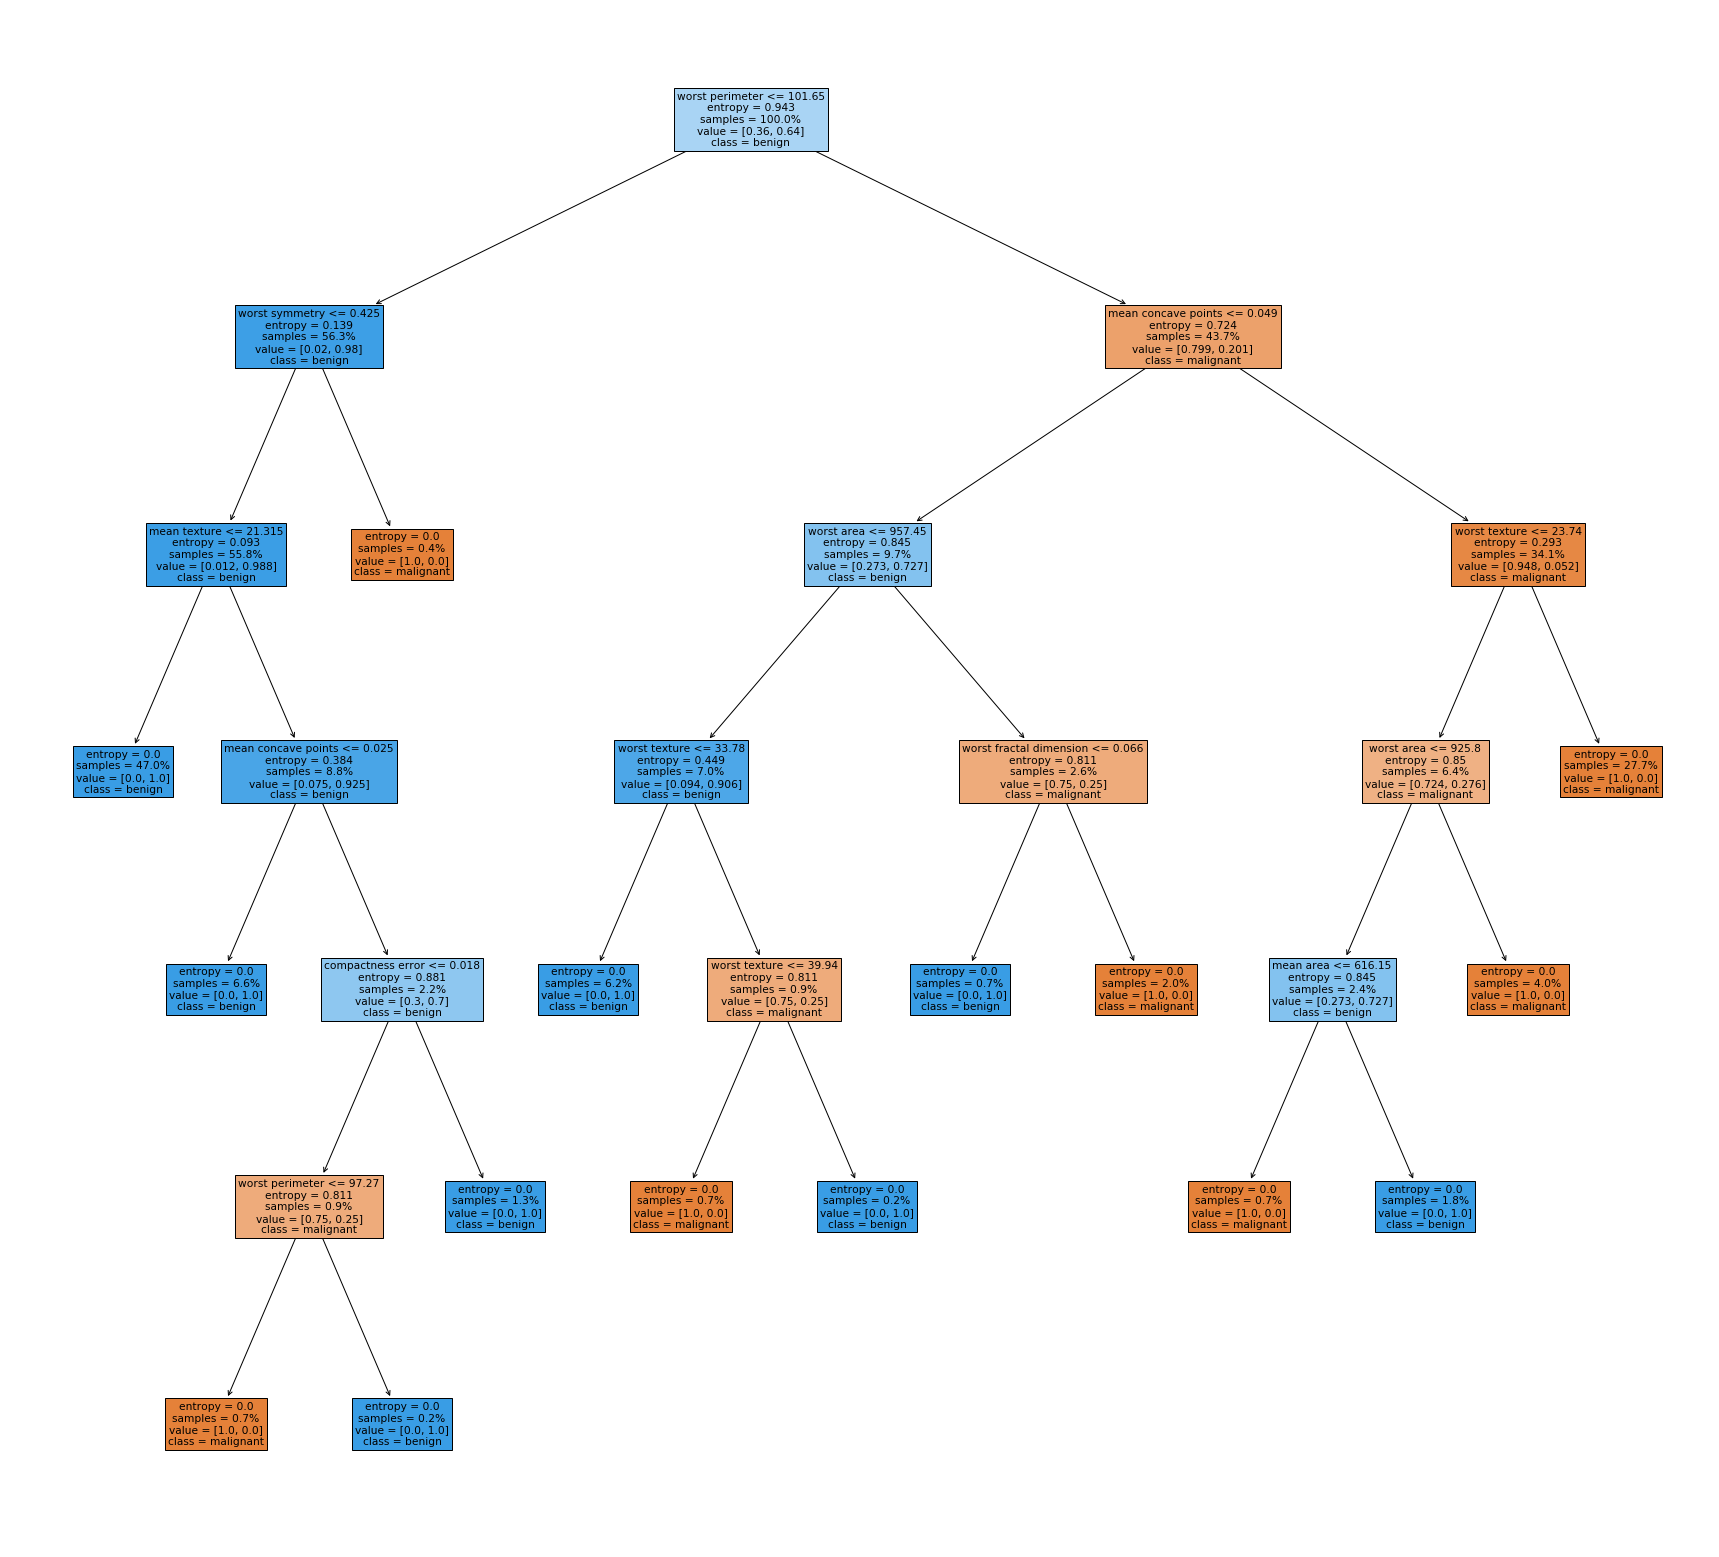

In [0]:
plt.figure(figsize=(30,28))
plot_tree(clf, filled=True, proportion=True, feature_names=breast_cancer_dataset.feature_names , class_names=breast_cancer_dataset.target_names)   #, max_depth=3)
plt.show()